In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
telecom_df_new = pd.read_excel('01_DataCleansing_Telecom_Churn.xlsx')
telecom_df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [47]:
telecom_df_new['Churn'].value_counts()

No     4383
Yes    1577
Name: Churn, dtype: int64

No-TechSupport, Month-to-month Contract, Electronic check payment, & Phoneservices-Yes account for > 84% of all churn

In [48]:

filter1 = telecom_df_new['TechSupport'] == 'No'
filter2 = telecom_df_new['Contract'] == 'Month-to-month'
filter3 = telecom_df_new['PaymentMethod'] == 'Electronic check'
filter4 = telecom_df_new['PhoneService'] == 'Yes'

telecom_churn = telecom_df_new.loc[(filter1 | filter3) & (filter2 | filter4), :]
telecom_churn['Churn'].value_counts()

No     2055
Yes    1334
Name: Churn, dtype: int64

In [49]:
sns.set_theme()

<AxesSubplot:xlabel='Churn', ylabel='count'>

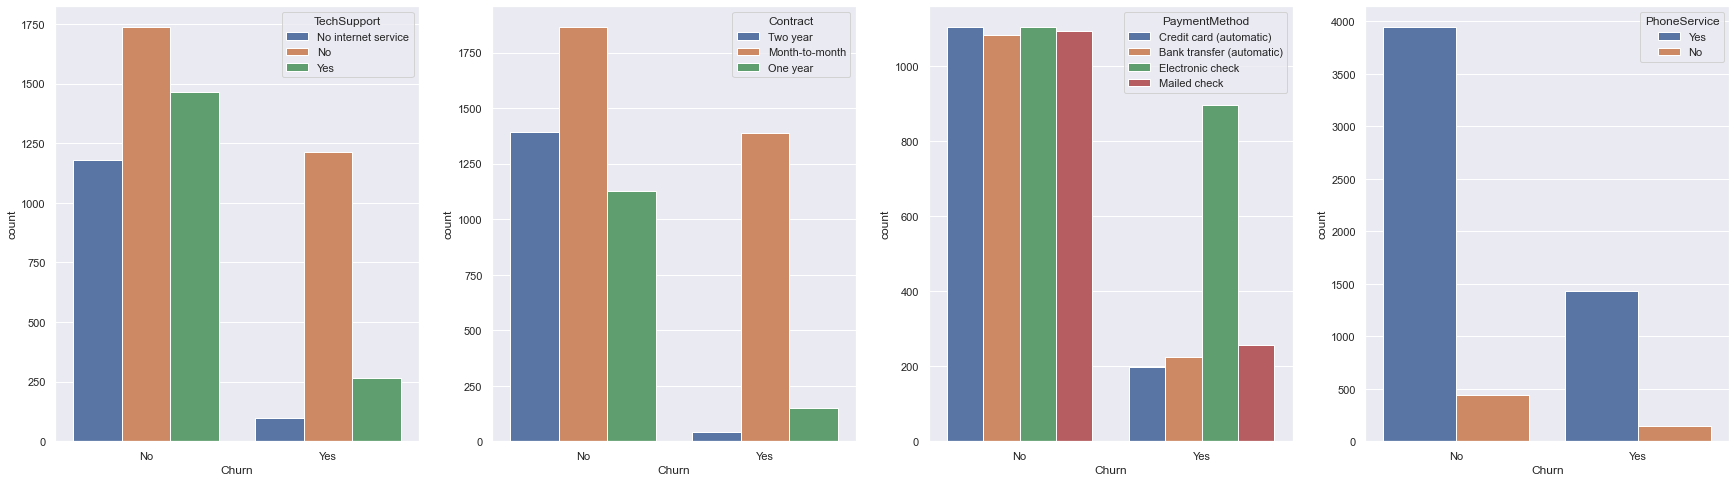

In [50]:
fig, axs = plt.subplots(ncols=4, figsize=(30,8))
sns.countplot(x='Churn', hue="TechSupport", data=telecom_df_new, ax=axs[0])
sns.countplot(x='Churn', hue="Contract", data=telecom_df_new, ax=axs[1])
sns.countplot(x='Churn', hue="PaymentMethod", data=telecom_df_new, ax=axs[2])
sns.countplot(x='Churn', hue="PhoneService", data=telecom_df_new, ax=axs[3])
